# Práctica 8 – Forecasting con Regresión Lineal (Anime Dataset)

En esta práctica realizaremos:

- Preparación de una serie de tiempo basada en la cantidad de animes por año.
- Visualización del comportamiento histórico.
- Entrenamiento de un modelo de regresión lineal.
- Predicción de lanzamientos futuros.
- Interpretación del pronóstico.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/Anime_clean.csv")
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [2]:
year_counts = df.groupby("Release_year").size().reset_index(name="count")

year_counts.head()


,Release_year,count
0,1907.0,1
1,1917.0,3
2,1918.0,2
3,1924.0,1
4,1925.0,4


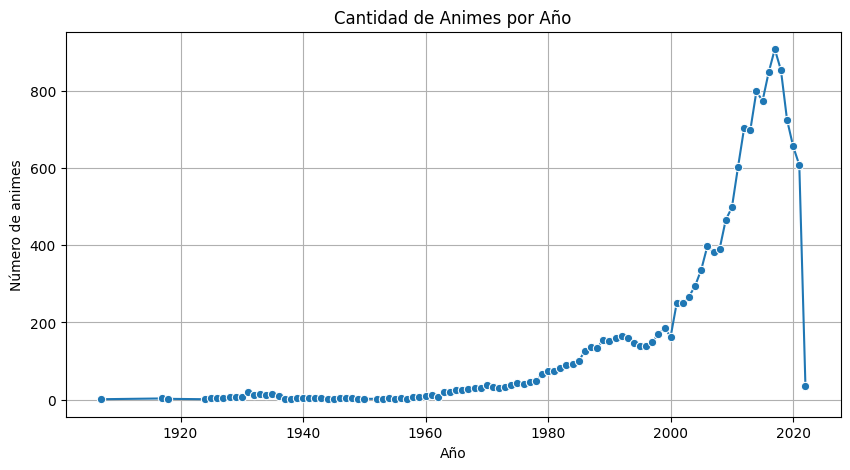

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(data=year_counts, x="Release_year", y="count", marker="o")
plt.title("Cantidad de Animes por Año")
plt.xlabel("Año")
plt.ylabel("Número de animes")
plt.grid()
plt.show()


In [ ]:
X = year_counts[["Release_year"]]  
y = year_counts["count"]           

X.shape, y.shape


((101, 1), (101,))

In [5]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [6]:
r2 = model.score(X, y)
r2


0.571372040250363

In [7]:
last_year = year_counts["Release_year"].max()

future_years = pd.DataFrame({
    "Release_year": np.arange(last_year + 1, last_year + 6)
})

future_years


,Release_year
0,2023.0
1,2024.0
2,2025.0
3,2026.0
4,2027.0


In [8]:
future_predictions = model.predict(future_years)

future_years["predicted_count"] = future_predictions
future_years


,Release_year,predicted_count
0,2023.0,457.875545
1,2024.0,463.812419
2,2025.0,469.749293
3,2026.0,475.686167
4,2027.0,481.623041


In [9]:
full_forecast = pd.concat([year_counts, future_years], ignore_index=True)
full_forecast


,Release_year,count,predicted_count
0,1907.0,1.0,NaN
1,1917.0,3.0,NaN
2,1918.0,2.0,NaN
3,1924.0,1.0,NaN
4,1925.0,4.0,NaN
...,...,...,...
101,2023.0,NaN,457.875545
102,2024.0,NaN,463.812419
103,2025.0,NaN,469.749293
104,2026.0,NaN,475.686167


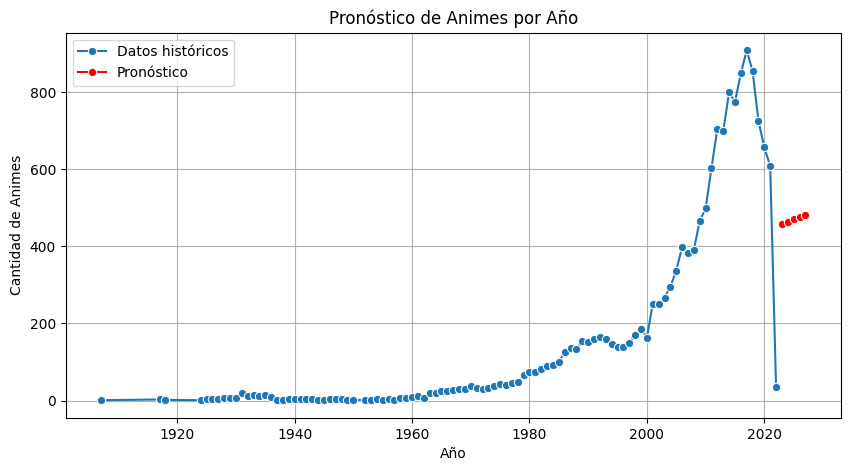

In [ ]:
plt.figure(figsize=(10,5))


sns.lineplot(
    data=year_counts,
    x="Release_year",
    y="count",
    marker="o",
    label="Datos históricos"
)


sns.lineplot(
    data=future_years,
    x="Release_year",
    y="predicted_count",
    marker="o",
    color="red",
    label="Pronóstico"
)

plt.title("Pronóstico de Animes por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Animes")
plt.grid()
plt.legend()
plt.show()
